In [64]:
import yfinance as yf

stock_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.796021  72.856613  71.545387  71.799873  135480400
2020-01-03  72.088272  72.851738  71.862869  72.020409  146322800
2020-01-06  72.662704  72.701485  70.953995  71.206062  118387200
2020-01-07  72.320976  72.929322  72.100418  72.672409  108872000
2020-01-08  73.484337  73.787300  72.022843  72.022843  132079200


In [65]:
stocks = ['AAPL', 'GOOGL', 'TSLA']
stock_data = yf.download(stocks, start='2023-01-01', end='2025-02-07')

print(stock_data.head())

[*********************100%***********************]  3 of 3 completed

Price            Close                               High             \
Ticker            AAPL      GOOGL        TSLA        AAPL      GOOGL   
Date                                                                   
2023-01-03  123.768463  88.798103  108.099998  129.537788  90.721133   
2023-01-04  125.045036  87.761856  113.639999  127.321104  90.322573   
2023-01-05  123.718979  85.888649  110.339996  126.440361  87.253703   
2023-01-06  128.271088  87.024521  113.059998  128.934113  87.373263   
2023-01-09  128.795578  87.702065  119.769997  132.021662  89.724738   

Price                          Low                               Open  \
Ticker            TSLA        AAPL      GOOGL        TSLA        AAPL   
Date                                                                    
2023-01-03  118.800003  122.877827  88.200264  104.639999  128.924245   
2023-01-04  114.589996  123.778358  86.954777  107.519997  125.569520   
2023-01-05  111.750000  123.461690  85.589737  107.160004 

In [66]:
print(stock_data.columns)

MultiIndex([( 'Close',  'AAPL'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'TSLA'),
            (  'High',  'AAPL'),
            (  'High', 'GOOGL'),
            (  'High',  'TSLA'),
            (   'Low',  'AAPL'),
            (   'Low', 'GOOGL'),
            (   'Low',  'TSLA'),
            (  'Open',  'AAPL'),
            (  'Open', 'GOOGL'),
            (  'Open',  'TSLA'),
            ('Volume',  'AAPL'),
            ('Volume', 'GOOGL'),
            ('Volume',  'TSLA')],
           names=['Price', 'Ticker'])


In [67]:
print(stock_data.index.is_monotonic_increasing)

True


In [68]:
adj_close = stock_data['Close']
print(adj_close.head())

Ticker            AAPL      GOOGL        TSLA
Date                                         
2023-01-03  123.768463  88.798103  108.099998
2023-01-04  125.045036  87.761856  113.639999
2023-01-05  123.718979  85.888649  110.339996
2023-01-06  128.271088  87.024521  113.059998
2023-01-09  128.795578  87.702065  119.769997


[*********************100%***********************]  1 of 1 completed

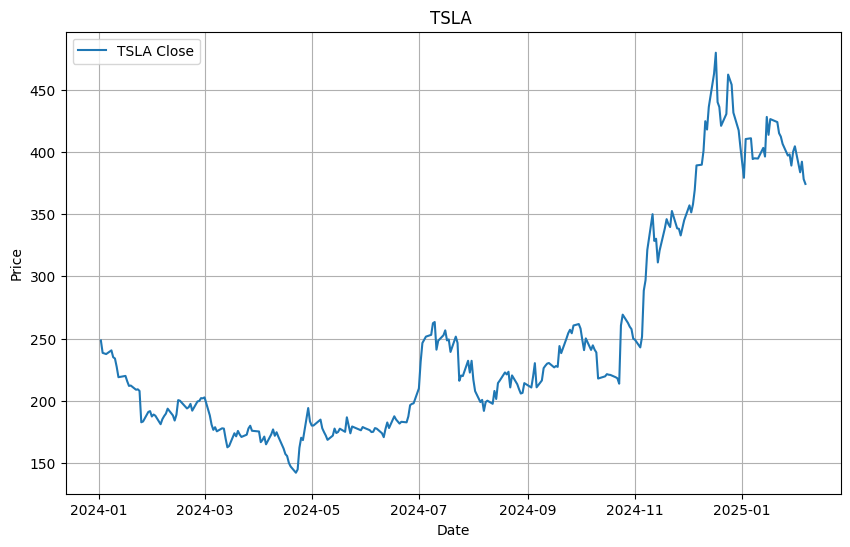

In [69]:
import matplotlib.pyplot as plt
import yfinance as yf

stock_data = yf.download('TSLA', start='2024-01-01', end='2025-02-07')

adj_close = stock_data['Close']

plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='TSLA Close')
plt.title('TSLA ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  3 of 3 completed


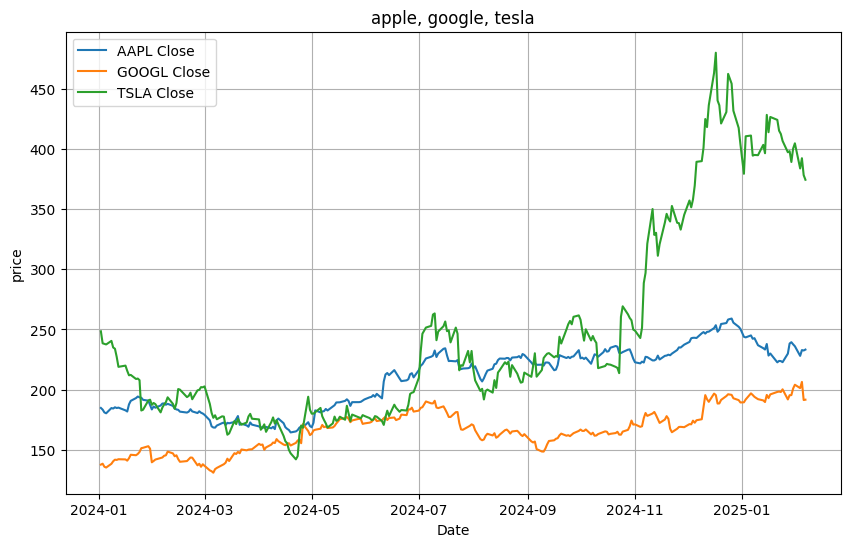

In [70]:
stocks = ['AAPL', 'GOOGL', 'TSLA']
stock_data = yf.download(stocks, start='2024-01-01', end='2025-02-07')

close = stock_data['Close']

plt.figure(figsize=(10, 6))
plt.plot(close, label=['AAPL Close', 'GOOGL Close', 'TSLA Close'])
plt.title('apple, google, tesla')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
stock_data.to_csv('stock_data.csv')

# Data cleaning

In [72]:
stock_data = yf.download('TSLA', start='2024-01-01', end='2025-02-07')

print(stock_data.isnull().sum())

[*********************100%***********************]  1 of 1 completed

Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64


In [73]:
#delete the rows with missing values
stock_data_cleaned = stock_data.dropna()

#fill the missing values with the previous value
stock_data_filled = stock_data.fillna(method='ffill')   

/tmp/ipykernel_2470/2422597959.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data_filled = stock_data.fillna(method='ffill')


In [74]:
print(stock_data.duplicated().sum()) #check for duplicates

stock_data = stock_data.drop_duplicates() #drop duplicates

0


### time series check

In [75]:
import pandas as pd

stock_data = stock_data.sort_index() #sort the data by index

stock_data.index = pd.to_datetime(stock_data.index) #convert the index to datetime

# Technical Indicator

### Moving Averages

### Simple Moving Average (SMA) and Exponential Moving Average (EMA)

**Simple Moving Average (SMA):**
- The SMA calculates the average price of an asset over a fixed period by giving equal weight to all price points.

**Exponential Moving Average (EMA):**
- The EMA is a weighted moving average that places more importance on recent prices, making it more responsive to price changes than the SMA.

Bullish Signal: When a short-term EMA (e.g., 10-day) crosses above a long-term EMA (e.g., 50-day).

Bearish Signal: When a short-term EMA crosses below a long-term EMA.

In [ ]:
#calculate the 50-day simple moving average
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
#calculate the 200-day simple moving average
stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()
#calculate the 50-day exponential moving average
stock_data['EMA_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()

print(stock_data)

Price            Close        High         Low        Open     Volume  \
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA   
Date                                                                    
2024-01-02  248.419998  251.250000  244.410004  250.080002  104654200   
2024-01-03  238.449997  245.679993  236.320007  244.979996  121082600   
2024-01-04  237.929993  242.699997  237.729996  239.250000  102629300   
2024-01-05  237.490005  240.119995  234.899994  236.860001   92379400   
2024-01-08  240.449997  241.250000  235.300003  236.139999   85166600   
...                ...         ...         ...         ...        ...   
2025-01-31  404.600006  419.989990  401.339996  401.529999   83568200   
2025-02-03  383.679993  389.170013  374.359985  386.679993   93732100   
2025-02-04  392.209991  394.000000  381.399994  382.630005   57072200   
2025-02-05  378.170013  388.390015  375.529999  387.510010   57223300   
2025-02-06  374.320007  375.399994  363.179993  373

### Relative Strength Index (RSI)
- RSI is a momentum oscillator that measures the speed and magnitude of recent price changes to evaluate whether an asset is overbought or oversold.

- RSI > 70 → Overbought (price may be overextended, potential for a pullback)
- RSI < 30 → Oversold (price may be undervalued, potential for a rebound)
- RSI = 50 → Neutral (no strong trend)

In [77]:
def calculate_RSI(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI_14'] = calculate_RSI(stock_data, window=14)
print(stock_data['RSI_14'])

Date
2024-01-02          NaN
2024-01-03          NaN
2024-01-04          NaN
2024-01-05          NaN
2024-01-08          NaN
                ...    
2025-01-31    53.814614
2025-02-03    43.068013
2025-02-04    48.550676
2025-02-05    30.035900
2025-02-06    32.796165
Name: RSI_14, Length: 276, dtype: float64


### MACD

In [ ]:
#calculate the moving average convergence divergence (MACD) and signal line
stock_data['MACD'] = stock_data['Close'].ewm(span=12, adjust=False).mean() - stock_data['Close'].ewm(span=26, adjust=False).mean()
#signal line is the 9-day EMA of the MACD
stock_data['Signal Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()
print(stock_data[['MACD','Signal Line']])

Price           MACD Signal Line
Ticker                          
Date                            
2024-01-02  0.000000    0.000000
2024-01-03 -0.795328   -0.159066
2024-01-04 -1.450866   -0.417426
2024-01-05 -1.983029   -0.730546
2024-01-08 -2.141242   -1.012686
...              ...         ...
2025-01-31  0.352961    3.450915
2025-02-03 -1.350726    2.490587
2025-02-04 -1.989676    1.594534
2025-02-05 -3.587601    0.558107
2025-02-06 -5.105775   -0.574669

[276 rows x 2 columns]


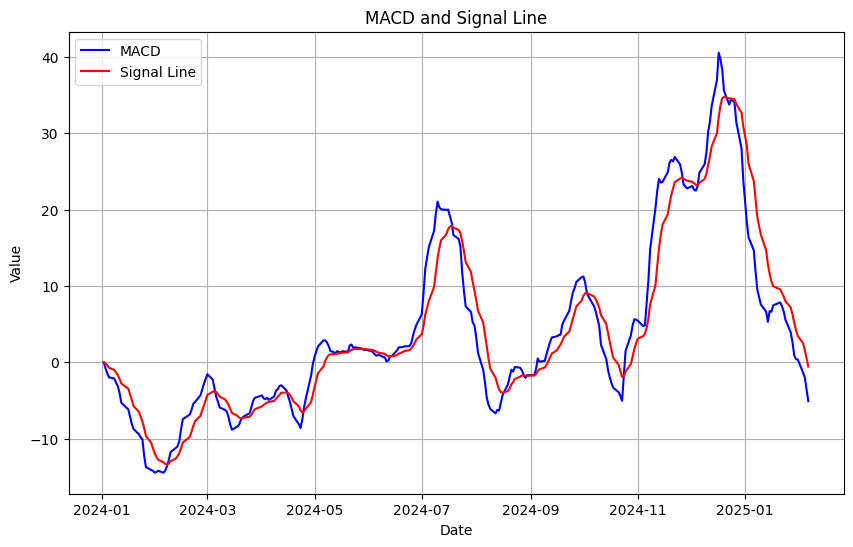

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['MACD'], label='MACD', color='b')
plt.plot(stock_data.index, stock_data['Signal Line'], label='Signal Line', color='r')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Volatility

In [ ]:
#calculate the Bollinger Bands
stock_data['Volatility_20'] = stock_data['Close'].rolling(window=20).std()
print(stock_data['Volatility_20'])

Date
2024-01-02          NaN
2024-01-03          NaN
2024-01-04          NaN
2024-01-05          NaN
2024-01-08          NaN
                ...    
2025-01-31    12.797126
2025-02-03    12.361765
2025-02-04    12.627329
2025-02-05    13.792650
2025-02-06    15.095543
Name: Volatility_20, Length: 276, dtype: float64


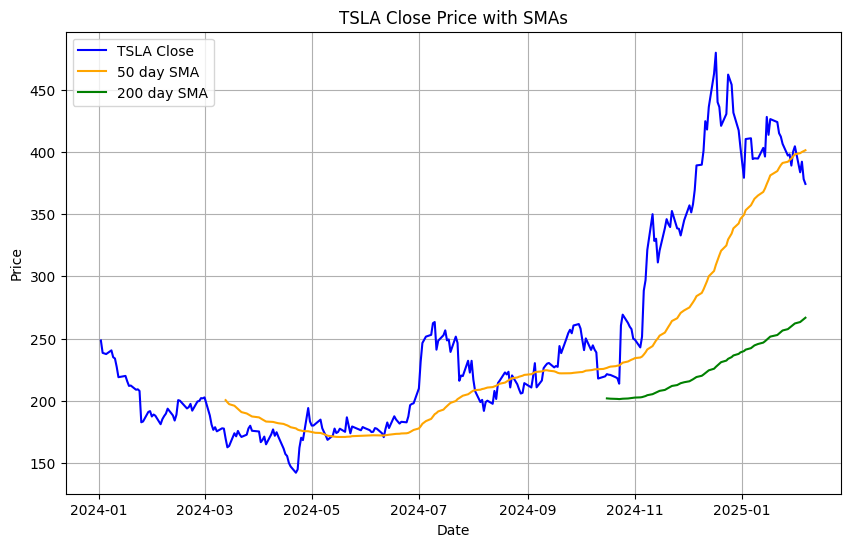

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='TSLA Close', color='blue')
plt.plot(stock_data['SMA_50'], label='50 day SMA', color='orange')
plt.plot(stock_data['SMA_200'], label='200 day SMA', color='green')
plt.title('TSLA Close Price with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

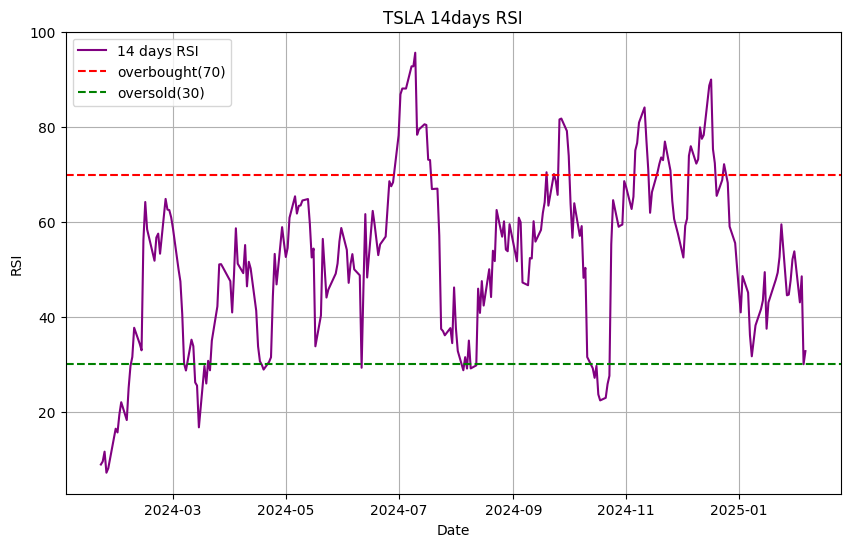

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['RSI_14'], label='14 days RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='overbought(70)')
plt.axhline(30, linestyle='--', color='green', label='oversold(30)')
plt.title('TSLA 14days RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

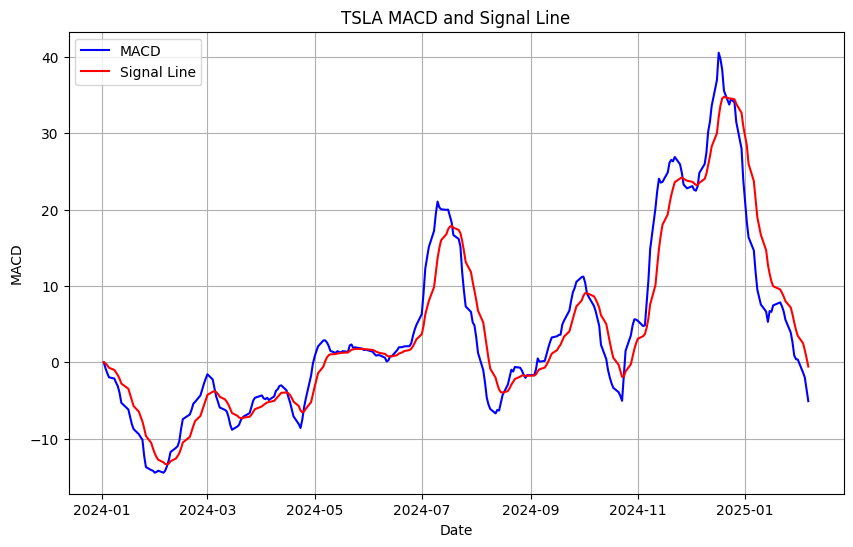

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['Signal Line'], label='Signal Line', color='red')
plt.title('TSLA MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

# finance index

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf

data = yf.download('TSLA', start='2025-01-01', end='2025-02-13')
prices = data['Close']

returns = prices.pct_change().dropna()

cumulative_return = (1 + returns).prod() - 1

volatility = returns.std()

risk_free_rate = 0.01

sharpe_ratio = (returns.mean() - risk_free_rate/252) / returns.std() * np.sqrt(252)

rolling_max = prices.cummax()
drawdown = (prices - rolling_max) / rolling_max
max_drawdown = drawdown.min()

print(f'return: {cumulative_return.values[0]:.2%}')
print(f'Volatility: {volatility.values[0]:.2%}')
print(f'sharpe ratio: {sharpe_ratio.values[0]:.2f}')
print(f'Max drawdown: {max_drawdown.values[0]:.2%}')

[*********************100%***********************]  1 of 1 completed

return: -11.28%
Volatility: 3.47%
sharpe ratio: -1.78
Max drawdown: -23.29%


[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_2249/4262477506.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][10:] = np.where(data['SMA_short'][10:] > data['SMA_long'][10:], 1, 0)


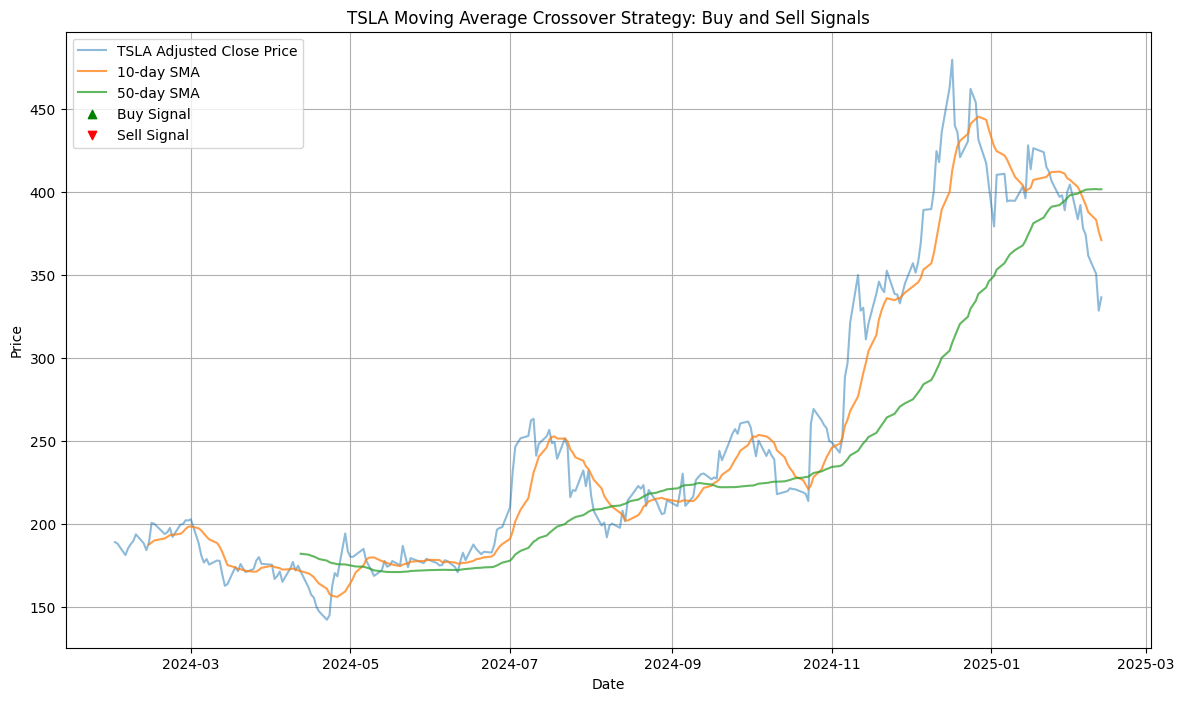

Buy Signals:
Empty DataFrame
Columns: [(Close, TSLA), (High, TSLA), (Low, TSLA), (Open, TSLA), (Volume, TSLA), (SMA_short, ), (SMA_long, ), (Signal, ), (Position, )]
Index: []
Sell Signals:
Empty DataFrame
Columns: [(Close, TSLA), (High, TSLA), (Low, TSLA), (Open, TSLA), (Volume, TSLA), (SMA_short, ), (SMA_long, ), (Signal, ), (Position, )]
Index: []


In [12]:
data = yf.download('TSLA', start='2024-02-01', end='2025-02-13')

data['SMA_short'] = data['Close'].rolling(window=10).mean()
data['SMA_long'] = data['Close'].rolling(window=50).mean()

data['Signal'] = 0
data['Signal'][10:] = np.where(data['SMA_short'][10:] > data['SMA_long'][10:], 1, 0)

data['Position'] = data['Signal'].diff()

buy_signals = data[data['Position'] == 1]
sell_signals = data[data['Position'] == -1]

plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='TSLA Adjusted Close Price', alpha=0.5)
plt.plot(data['SMA_short'], label='10-day SMA', alpha=0.75)
plt.plot(data['SMA_long'], label='50-day SMA', alpha=0.75)

plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('TSLA Moving Average Crossover Strategy: Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

print("Buy Signals:")
print(buy_signals)

print("Sell Signals:")
print(sell_signals)


In [ ]:
short_windows = [5, 10, 15]
long_windows = [20, 50, 100]

best_sharpe = -np.inf
best_params = (None, None)

for short_window in short_windows:
    for long_window in long_windows:
        if short_window >= long_window:
            continue
        data['SMA_short'] = data['Close'].rolling(window=short_window).mean()
        data['SMA_long'] = data['Close'].rolling(window=long_window).mean()
        data['Signal'] = 0
        data['Signal'][long_window:] = np.where(data['SMA_short'][long_window:] > data['SMA_long'][long_window:], 1, 0)
        data['Position'] = data['Signal'].diff()
        data['Strategy_Returns'] = data['Close'].pct_change() * data['Position'].shift(1)
        strategy_returns = data['Strategy_Returns'].dropna()
        sharpe_ratio = (strategy_returns.mean() - risk_free_rate/252) / strategy_returns.std() * np.sqrt(252)
        if sharpe_ratio > best_sharpe:
            best_sharpe = sharpe_ratio
            best_params = (short_window, long_window)

print(f'最佳參數組合: 短期均線={best_params[0]}, 長期均線={best_params[1]}, 夏普比率={best_sharpe:.2f}')

ValueError: Columns must be same length as key